In [459]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import PuOr
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from pycebox.ice import ice, ice_plot
import pandas as pd

## скачать данные
## download data

In [460]:
# from io import BytesIO
# from zipfile import ZipFile
# import pandas
# import requests


# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
# filename = requests.get(url).content
# z = ZipFile( BytesIO(filename), 'r' )
# for item in z.namelist():
#     print("File in zip: "+ item)
# data = pd.read_csv(z.open("day.csv"))


In [461]:
data = pd.read_csv("D:\dataset\Bike-Sharing-Dataset\day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [462]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Проверить, потеряны ли данные
## check data missing or not

In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [464]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [465]:
data = data.replace("?", np.nan)
data = data.infer_objects()

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## не надо заполнить данные
## no need to replace missing data


## разделить набора данных на зависимые и независимые переменные¶
## split the dataset into dependent and independent variables

In [466]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [467]:
data_X=data.drop(['yr', 'cnt', 'dteday','registered','casual','instant'], axis=1)
X = pd.DataFrame(data = data_X)

y = data.cnt

# # удалить среднее значение
# # substract mean
# y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [468]:
X.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [469]:
X_test

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
196,3,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342
187,3,7,0,4,1,1,0.750000,0.686871,0.651250,0.159200
14,1,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963
31,1,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213
390,1,1,0,4,1,2,0.341667,0.356050,0.769583,0.073396
...,...,...,...,...,...,...,...,...,...,...
669,4,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667
495,2,5,0,4,1,1,0.505833,0.491783,0.552083,0.314063
557,3,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733
449,2,3,0,0,0,2,0.437500,0.437488,0.880833,0.220775


## построить модель и оценить модель
## build model and evaluate model

In [470]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time

print("Training GradientBoostingRegressor...")
tic = time()
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

print("done in {:.2f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))

Training GradientBoostingRegressor...
done in 0.46s
Test R2 score: 0.56


In [471]:
print(X.columns)

features = X.columns.tolist()

print(features)

print(pd.Index(features))

print(X_test[features])

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
     season  mnth  holiday  weekday  workingday  weathersit      temp  \
196       3     7        0        6           0           1  0.686667   
187       3     7        0        4           1           1  0.750000   
14        1     1        0        6           0           2  0.233333   
31        1     2        0        2           1           2  0.192174   
390       1     1        0        4           1           2  0.341667   
..      ...   ...      ...      ...         ...         ...       ...   
669       4    10        0        3           1           2  0.357500   
495       2     5        0

In [472]:
features = X.columns.tolist()

features

['season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [473]:
from shap import TreeExplainer


import shap

explainer  = shap.TreeExplainer(model)

# shap_values = explainer.shap_values(X_train)
# shap_values = explainer.shap_values(X_train)
# shap_values = explainer(X_train)

# shap_df = pd.DataFrame(shap_values, columns=pd.Index(features, name='features'))


shap_values = explainer.shap_values(X_train)
# shap_df = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features'))

shap_values


array([[-143.32395595, -253.58612602,    0.        , ..., -392.99920024,
         154.6422281 ,   92.19865809],
       [ 366.11818855,  203.87266488,    0.        , ..., -228.55340258,
         -17.5930863 ,  467.80725168],
       [-296.24851945, -219.32835789,    0.        , ...,  352.07356801,
         425.60415067,  -57.99449384],
       ...,
       [ 165.9410008 ,  281.2879361 ,    0.        , ...,  669.36621914,
         227.43071823,  235.627023  ],
       [ 170.58665962,  -75.79131932,    0.        , ...,  -57.06948454,
         639.08907643,  596.98449917],
       [ 676.34260028,  134.53849837,    0.        , ...,   93.92021529,
         386.43602736,  246.04761475]])

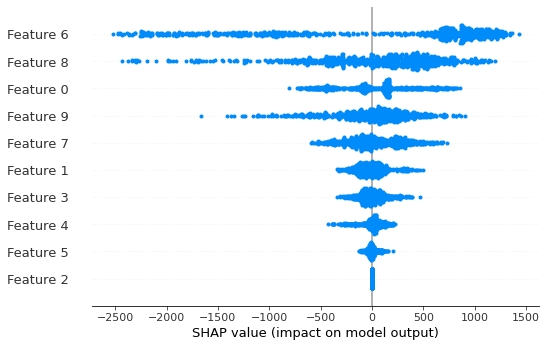

In [474]:
shap.summary_plot(shap_values)


In [18]:
shap_values

.values =
array([[-143.32395595, -253.58612602,    0.        , ..., -392.99920024,
         154.6422281 ,   92.19865809],
       [ 366.11818855,  203.87266488,    0.        , ..., -228.55340258,
         -17.5930863 ,  467.80725168],
       [-296.24851945, -219.32835789,    0.        , ...,  352.07356801,
         425.60415067,  -57.99449384],
       ...,
       [ 165.9410008 ,  281.2879361 ,    0.        , ...,  669.36621914,
         227.43071823,  235.627023  ],
       [ 170.58665962,  -75.79131932,    0.        , ...,  -57.06948454,
         639.08907643,  596.98449917],
       [ 676.34260028,  134.53849837,    0.        , ...,   93.92021529,
         386.43602736,  246.04761475]])

.base_values =
array([[4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
       [4492.08523598],
 

In [195]:
# Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, 
#     but you have passed an array as the first parameter! 
#     Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) 
#     or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

# shap.plots.waterfall(shap_values.base_values[0], shap_values.values[0])

# shap.waterfall_plot(explainer.base_values[0], shap_values[0], X_train[0])

shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [89]:
# user_type: registered or casual user
# comfort_factors: temp, body temp, normalized humidity
# weather: weathersit, windspeed
# period_holiday_or_workdays: weekday, working, holiday
# period_in_a_year: season, mnth
#     'user_type': ['registered',
#                   'causl'
#                  ],
    
feature_groups = {
    'comfort_factors': ['temp',
                        'atemp',
                        'hum',
                       ],
    
    'weather': ['weathersit',
                'windspeed'
               ],
    
    'period_holiday_or_workdays': ['weekday',
                                   'workingday',
                                   'holiday'
                                  ],
    
    'period_year': ['season',
                    'mnth'
                   ]
}

feature_groups


{'comfort_factors': ['temp', 'atemp', 'hum'],
 'weather': ['weathersit', 'windspeed'],
 'period_holiday_or_workdays': ['weekday', 'workingday', 'holiday'],
 'period_year': ['season', 'mnth']}

In [20]:
# shap.summary_plot(X.values, X)
# shap.force_plot(shap_df.values, shap_df)


In [33]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算欧拉距离
def calcDis(dataSet, centroids, k):
    clalist=[]
    for data in dataSet:
        diff = np.tile(data, (k, 1)) - centroids  #相减   (np.tile(a,(2,1))就是把a先沿x轴复制1倍，即没有复制，仍然是 [0,1,2]。 再把结果沿y方向复制2倍得到array([[0,1,2],[0,1,2]]))
        squaredDiff = diff ** 2     #平方
        squaredDist = np.sum(squaredDiff, axis=1)   #和  (axis=1表示行)
        distance = squaredDist ** 0.5  #开根号
        clalist.append(distance) 
    clalist = np.array(clalist)  #返回一个每个点到质点的距离len(dateSet)*k的数组
    return clalist

# 计算质心
def classify(dataSet, centroids, k):
    # 计算样本到质心的距离
    clalist = calcDis(dataSet, centroids, k)
    # 分组并计算新的质心
    minDistIndices = np.argmin(clalist, axis=1)    #axis=1 表示求出每行的最小值的下标
    newCentroids = pd.DataFrame(dataSet).groupby(minDistIndices).mean() #DataFramte(dataSet)对DataSet分组，groupby(min)按照min进行统计分类，mean()对分类结果求均值
    newCentroids = newCentroids.values
 
    # 计算变化量
    changed = newCentroids - centroids
 
    return changed, newCentroids

# 使用k-means分类
def kmeans(dataSet, k):
    # 随机取质心
    centroids = random.sample(dataSet, k)
    
    # 更新质心 直到变化量全为0
    changed, newCentroids = classify(dataSet, centroids, k)
    while np.any(changed != 0):
        changed, newCentroids = classify(dataSet, newCentroids, k)
 
    centroids = sorted(newCentroids.tolist())   #tolist()将矩阵转换成列表 sorted()排序
 
    # 根据质心计算每个集群
    cluster = []
    clalist = calcDis(dataSet, centroids, k) #调用欧拉距离
    minDistIndices = np.argmin(clalist, axis=1)  
    for i in range(k):
        cluster.append([])
    for i, j in enumerate(minDistIndices):   #enymerate()可同时遍历索引和遍历元素
        cluster[j].append(dataSet[i])
        
    return centroids, cluster


In [34]:
# idx_test = 0
# print(model.predict(X_train[idx_test:idx_test+1])[0])


In [23]:
# feature = 'yr'
# if feature in X.columns:
#     print(1)
# else:
#     print(0)

# # print(X['yr'][0])

# # change element
# d_index = list(X.columns).index(feature)
# print(d_index)
# X.iloc[0, d_index] = 0

# print(X['yr'][0])


In [21]:
# import numpy as np
# a = numpy.zeros(shape=(1, len(X.columns)))
# a = pd.DataFrame(a, columns=pd.Index(features, name='features'))

# d_index = list(a.columns).index('windspeed')
# print(d_index)
# a.iloc[0, d_index] = rand_get(X, d_index)


# # print(a)
# a

In [25]:
# X_ttt = X.iloc[5:5+1]
# model.predict(X_ttt)[0]

In [26]:
# a2 = To0(a, X_train, feature_groups['comfort_factors'])
# # print(model.predict(a1))
# a

NameError: name 'To0' is not defined

In [22]:
# ttt = get_one_feature_group_SHAP(X_train, model, feature_groups, list(feature_groups.keys())[0], 0)
# ttt

In [24]:
# l = 100
# ten_to_two(8, math.ceil(np.log2(8)))

# it = 0

# str2 = ''
# for i in range(0, 11):
#     str2 = str2 + str(0)

# str2

In [25]:
shap_df

features,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-143.323956,-253.586126,0.0,-96.851053,-5.893465,-43.658322,445.849205,-392.999200,154.642228,92.198658
1,366.118189,203.872665,0.0,11.232291,5.807220,19.390863,814.218628,-228.553403,-17.593086,467.807252
2,-296.248519,-219.328358,0.0,-44.776681,-21.523697,-10.974881,1080.013857,352.073568,425.604151,-57.994494
3,141.484183,-42.248332,0.0,-105.720564,19.225323,-3.994689,855.799870,337.973374,447.718770,69.778937
4,617.696076,33.452736,0.0,-64.431926,-313.358442,-23.595582,-2146.077645,-147.391835,186.055208,-65.011293
...,...,...,...,...,...,...,...,...,...,...
652,558.963477,82.227012,0.0,262.283533,-41.227808,113.926621,-453.632138,311.926735,-1249.590283,480.331088
653,102.868541,-145.111376,0.0,-85.724391,26.836608,11.542846,511.421818,-474.768926,169.447525,-72.712409
654,165.941001,281.287936,0.0,161.449604,18.521571,-9.595961,1201.493403,669.366219,227.430718,235.627023
655,170.586660,-75.791319,0.0,130.522596,48.479466,88.751955,807.097558,-57.069485,639.089076,596.984499


In [26]:
shap.summary_plot(group_shapley_values, feature_groups)

NameError: name 'group_shapley_values' is not defined

In [33]:
row_index = 0
num_test = 10

fi_0, group_shapley_values, sum_fi_0_to_j = count_average_get_one_sample_group_SHAP_Kernal(X_train, model, 
                                                                                           feature_groups, 
                                                                                           row_index, num_test)
print("fi_0:")
print(fi_0)

print("group_shapley_values:")
print(group_shapley_values)

print("sum_fi_0_to_j:")
print(sum_fi_0_to_j)

print("predict is:")
print(model.predict(X_train.iloc[row_index:row_index+1]))

fi_0:
4437.457599013088
group_shapley_values:
[ -14.84488817   72.45863684 -428.94862644 -718.34837524]
sum_fi_0_to_j:
3347.774346006263
predict is:
[4248.4632043]


In [637]:
row_index = 1
num_test = 1

fi_0, group_shapley_values, sum_fi_0_to_j = count_average_get_one_sample_group_SHAP_Kernal(X_train, model, feature_groups, row_index, num_test)
# fi_0, group_shapley_values, sum_fi_0_to_j = get_one_sample_group_SHAP_Kernal(X_train, model, feature_groups, row_index)

print("fi_0:")
print(fi_0)

print("group_shapley_values:")
print(group_shapley_values)

print("sum_fi_0_to_j:")
print(sum_fi_0_to_j)

print("predict is:")
print(model.predict(X_train.iloc[row_index:row_index+1]))

fi_0:
4872.9126175448
group_shapley_values:
[868.8647653  772.11735501  18.17986341 654.44330738]
sum_fi_0_to_j:
7186.517908658161
predict is:
[6134.38585408]


In [686]:
group_shapley_values_df = pd.DataFrame([group_shapley_values], columns=pd.Index(list(feature_groups.keys()), name='group'))
group_shapley_values_df
group_shapley_values_df

group,comfort_factors,weather,period_holiday_or_workdays,period_year
0,868.864765,772.117355,18.179863,654.443307


In [640]:
group_shapley_values_df.index=[row_index]

group_shapley_values_df

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,868.864765,772.117355,18.179863,654.443307


In [440]:
sum_fi_0_to_j - fi_0

2300.615142375643

In [643]:
group_shapley_values_df / (sum_fi_0_to_j - fi_0)

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,0.375546,0.333729,0.007858,0.282867


In [648]:
sum_group_shapley_values_df[row_index:row_index+1] / get_sum(sum_group_shapley_values_df[row_index:row_index+1])

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,0.3459,0.296656,0.010375,0.347069


In [645]:
sum_group_shapley_values_df[row_index:row_index+1]

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,568.072139,487.198115,17.03951,569.990853


In [647]:
def get_sum(df):
    a_sum = 0
    for i in range(len(df.iloc[0])):
        a_sum = a_sum + df.values[0][i]
    return a_sum

In [27]:
import random
import math
import numpy as np

def ten_to_two(num, len_all):
    atemp = bin(num)[2:]
    len_atemp = len(atemp)
    astr = ''
    for i in range(0, len_all - len_atemp):
        astr = astr + str(0)
    astr = astr + str(atemp)
    return astr

def rand_get(array_df, col_need):
    row_total = array_df.shape[0]
    row_need = random.randint(0, row_total-1)
    return array_df.values[row_need, col_need]

def To0_with_X_0(X_now, X, features_names_in_one_group, X_0):
    X_now_2 = X_now.copy(deep=True)
    features = X.columns.tolist()
    for feature in features:
        if feature in features_names_in_one_group:
            d_index = list(X.columns).index(feature)
            X_now_2.iloc[0, d_index] = X_0.iloc[0, d_index]
        else:
            continue
    return X_now_2

def To0(X_now, X, features_names_in_one_group):
    X_now_2 = X_now.copy(deep=True)
    features = X.columns.tolist()
    for feature in features:
        if feature in features_names_in_one_group:
            d_index = list(X.columns).index(feature)
            X_now_2.iloc[0, d_index] = rand_get(X, d_index)
        else:
            continue
    return X_now_2

# def To1(X, group):
#     for feature in X.columns:
#         if feature in group:
#             d_index = list(X.columns).index(feature)
#             X.iloc[0, d_index] = rand_get(X, d_index)
#         else:
#             continue
#     return X.iloc[0:1]

def Weight(p, S):
    a1 = 1
    a2 = 1
    for i in range(1, p-S):
        a1 = a1 * i
    for i in range(S+1, p+1):
        a2 = a2 * i
    return a1/a2

In [22]:
# for one group in one row
def get_one_feature_group_SHAP(X, model, feature_groups, need_group_name, row_index, X_0):
    a = 0
    X_now = X.iloc[row_index:row_index+1]
    i_end = pow(2, len(feature_groups)-1)
    i_number_1 = 0
    len_f_g = len(feature_groups)
    for i in range(0, i_end):
        i_flag = 0
        
        for group in feature_groups.keys():
            if group == need_group_name:
                continue
            if ten_to_two(i, len(feature_groups)-1)[i_flag] == '0':
#                 set don't have this group feature
#                 X_now = To0(X_now, X, feature_groups[group])
                X_now = To0_with_X_0(X_now, X, feature_groups[group], X_0)
            else:
                i_number_1 = i_number_1 + 1
                continue
#                 continue is ok, no need to use To1(), because orignal data already have this group features
#                 set have this group feature
            i_flag = i_flag + 1
    
        temp1 = To0_with_X_0(X_now, X, feature_groups[need_group_name], X_0)
        atemp = model.predict(X_now)[0] - model.predict(temp1)[0]
        a += Weight(len_f_g, i_number_1)*atemp
        i_number_1 = 0
        X_now = X.iloc[row_index:row_index+1]
        
    return a

In [371]:
# for one row
def get_one_sample_group_SHAP(X, model, feature_groups, row_index):
    X_0 = X.iloc[row_index:row_index+1]
    
    for group in feature_groups.keys():
        X_0 = To0(X_0, X, feature_groups[group])

    fi_0 = model.predict(X_0)[0]
    sum_fi_0_to_j = fi_0
    group_shapley_values = []
    
    for group_name in feature_groups.keys():
        fi_j = get_one_feature_group_SHAP(X, model, feature_groups, group_name, row_index, X_0)
        sum_fi_0_to_j = sum_fi_0_to_j + fi_j
        group_shapley_values.append(fi_j)

    return fi_0, group_shapley_values, sum_fi_0_to_j

# count average for one row
def count_average_get_one_sample_group_SHAP(X, model, feature_groups, row_index, num_test):
    temp_fi_0 = 0
    temp_group_shapley_values = np.zeros(len(feature_groups))
    temp_sum_fi_0_to_j = 0
    
    for i in range(0, num_test):
        fi_0, group_shapley_values, sum_fi_0_to_j = get_one_sample_group_SHAP(X, model, feature_groups, row_index)
        temp_fi_0 = temp_fi_0 + fi_0
        
        for i in range(0, len(feature_groups)):
            temp_group_shapley_values[i] = temp_group_shapley_values[i] + group_shapley_values[i]
        
        temp_sum_fi_0_to_j = temp_sum_fi_0_to_j + sum_fi_0_to_j
    
    return temp_fi_0/num_test, temp_group_shapley_values/num_test, temp_sum_fi_0_to_j/num_test


In [229]:
str_test = '0001001'
str_test[4]

'0'

In [716]:
mat_z_test_map = get_all_binary_z(len(feature_groups))
mat_z_test_map

array([['0000'],
       ['0001'],
       ['0010'],
       ['0011'],
       ['0100'],
       ['0101'],
       ['0110'],
       ['0111'],
       ['1000'],
       ['1001'],
       ['1010'],
       ['1011'],
       ['1100'],
       ['1101'],
       ['1110'],
       ['1111']], dtype='<U4')

In [222]:
Pi_x(mat_z_test[6][0])

0.125

In [122]:
row_index = 0
X_train[row_index:row_index+1]

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
103,2,8,0,4,1,1,0.4675,0.462742,0.540417,0.1107


In [708]:
mat_test, mat_test_map = get_all_S_and_S_map(X_train, feature_groups, 0)


In [709]:
X_old

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
103,2,8,0,4,1,1,0.4675,0.462742,0.540417,0.1107


In [710]:
X_00

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
103,4,5,0,1,0,2,0.376667,0.522125,0.5775,0.228858


In [713]:
mat_test

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,3.0,8.0,0.0,1.0,1.0,2.0,0.6200,0.377504,0.625417,0.144904
1,2.0,4.0,0.0,1.0,1.0,2.0,0.6200,0.377504,0.625417,0.144904
2,3.0,8.0,0.0,4.0,1.0,2.0,0.6200,0.377504,0.625417,0.144904
3,2.0,4.0,0.0,4.0,1.0,2.0,0.6200,0.377504,0.625417,0.144904
4,3.0,8.0,0.0,1.0,1.0,1.0,0.6200,0.377504,0.625417,0.110700
5,2.0,4.0,0.0,1.0,1.0,1.0,0.6200,0.377504,0.625417,0.110700
6,3.0,8.0,0.0,4.0,1.0,1.0,0.6200,0.377504,0.625417,0.110700
7,2.0,4.0,0.0,4.0,1.0,1.0,0.6200,0.377504,0.625417,0.110700
8,3.0,8.0,0.0,1.0,1.0,2.0,0.4675,0.462742,0.540417,0.144904
9,2.0,4.0,0.0,1.0,1.0,2.0,0.4675,0.462742,0.540417,0.144904


In [712]:
mat_test_map

array([['0000000000'],
       ['1100000000'],
       ['0011100000'],
       ['1111100000'],
       ['0000010001'],
       ['1100010001'],
       ['0011110001'],
       ['1111110001'],
       ['0000001110'],
       ['1100001110'],
       ['0011101110'],
       ['1111101110'],
       ['0000011111'],
       ['1100011111'],
       ['0011111111'],
       ['1111111111']], dtype='<U10')

In [149]:
feature_groups

{'comfort_factors': ['temp', 'atemp', 'hum'],
 'weather': ['weathersit', 'windspeed'],
 'period_holiday_or_workdays': ['weekday', 'workingday', 'holiday'],
 'period_year': ['season', 'mnth']}

In [274]:
# get_all_S
import numpy as np

def To0_map(X_map, features, features_names_in_one_group):
    X_temp_map = X_map
    for i in range(0, len(features)):
        for feature in features_names_in_one_group:
            if features[i] == feature:
                X_temp_map = list(X_temp_map)
                X_temp_map[i] = '0'
                X_temp_map = ''.join(X_temp_map)
    return X_temp_map

def get_all_S_and_S_map(X, feature_groups, row_index):
    X_0 = X.iloc[row_index:row_index+1].copy(deep=True)
    X_0_map = ''
    
    for i in range(0, len(X.columns)):
        X_0_map = X_0_map + '0'
    for group in feature_groups.keys():
        X_0 = To0(X_0, X, feature_groups[group])
    
    mat = X_0.copy(deep=True)
    mat_map = X_0_map
    
    X_temp_map_old = ''
    for i in range(0, len(X.columns)):
        X_temp_map_old = X_temp_map_old + '1'
        
    for i in range(pow(len(feature_groups), 2)):
        X_temp = X.iloc[row_index:row_index+1].copy(deep=True)
        X_temp_map = X_temp_map_old
        
        i_flag = 0
        for group in feature_groups.keys():
            if ten_to_two(i, len(feature_groups))[i_flag] == '0':
                X_temp = To0_with_X_0(X_temp, X, feature_groups[group], X_0)
                X_temp_map = To0_map(X_temp_map, X.columns, feature_groups[group])
            i_flag = i_flag + 1
            
        mat = np.row_stack((mat, X_temp))
        mat_map = np.row_stack((mat_map, X_temp_map))
        
    mat_df = pd.DataFrame(mat[1:pow(len(feature_groups),2)+1], columns=pd.Index(X.columns))

    return mat_df, mat_map[1:pow(len(feature_groups),2)+1]

#     return mat[1:pow(len(feature_groups),2)+1], mat_map[1:pow(len(feature_groups),2)+1]
#     return X.iloc[row_index:row_index+1], X_0, mat[1:pow(len(feature_groups),2)+1], mat_map[1:pow(len(feature_groups),2)+1]

# matrix type char
def get_all_binary_z(num):
    mat = ten_to_two(0, len(feature_groups))
    for i in range(1, pow(num,2)):
        mat = np.row_stack((mat, ten_to_two(i, len(feature_groups))))
    return mat

# type z_: str
def Pi_x(z_):
    M = len(z_)
    z = 0
    for i in range(len(z_)):
        if z_[i] == '1':
            z = z + 1
    a_sum = 1
    for i in range(1, M-z):
        a_sum = a_sum * i
    for i in range(z, M-1):
        a_sum = a_sum / i
    return a_sum / M

# type X_map: matrix of char
# def g(w, b, X_map):
#     temp = 0
#     for i in range(len(w)):
#         temp = temp + w[i]*(int(X_map[i]))
#     return temp + b

# type one_row_Z_map, one_row_X_map: string or matrix of char
def g(w, b, one_row_Z_map, feature_groups):
    i = -1
    temp = 0
    for group in feature_groups:
        i = i + 1
        if one_row_Z_map[i] == '0':
            continue
        temp = temp + w[i]
#         temp = temp + w[i]*len(group)
    return temp + b

In [280]:
def optimization_model(w, b, Z_map, X, X_map, model, feature_groups):
    dw = np.zeros(len(feature_groups))
    db = 0
    for j in range(0, len(w)):
        for i in range(1, len(Z_map)-1):
#             dw[j]=dw[j]+(model.predict(X[i])[0]-g(w,b,Z_map[i][0],feature_groups))*Pi_x(Z_map[i][0])*(int(list(Z_map[i][0])[j]))
            dw[j]=dw[j]+(model.predict(X.iloc[i:i+1])[0]-g(w,b,Z_map[i][0],feature_groups))*Pi_x(Z_map[i][0])*(int(list(Z_map[i][0])[j]))
    
    for i in range(1, len(Z_map)-1):
        db=db+(model.predict(X.iloc[i:i+1])[0]-g(w,b,Z_map[i][0],feature_groups))*Pi_x(Z_map[i][0])
    dw = (-2)*dw
    db = (-2)*db
    return dw, db

In [357]:
def RunGD(X, row_index, model, feature_groups, learning_rate, num_it):
    X_new, X_new_map = get_all_S_and_S_map(X, feature_groups, row_index)
    Z_map = get_all_binary_z(len(feature_groups))
    
    w = np.zeros(len(feature_groups))
    b = 0
    for i in range(0, num_it):
        dw, db = optimization_model(w, b, Z_map, X_new, X_new_map, model, feature_groups)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
    return w, b

In [364]:
def KernalSHAP_for_feature_groups(X, row_index, model, feature_groups, learning_rate=0.01, num_it=10):
    w, b = RunGD(X, row_index, model, feature_groups, learning_rate, num_it)
#     w_df = pd.DataFrame(w, columns=pd.Index(list(feature_groups.keys()), name='group'))
    return b, w

In [698]:
row_index = 1
learning_rate = 0.0001
num_it = 100
new_test2_fi_0, new_test2_fi_j = KernalSHAP_for_feature_groups(X_train, row_index, model, feature_groups, learning_rate, num_it)
new_test2_fi_j


array([157.20789197, 253.39873245,  63.78942773, 156.95240157])

In [707]:
row_index = 1
learning_rate = 0.01
num_it = 30
new_test2_fi_0, new_test2_fi_j = KernalSHAP_for_feature_groups(X_train, row_index, model, feature_groups, learning_rate, num_it)
new_test2_fi_j

new_test2_fi_j

array([103.57116016, 248.94888065,  53.23508556, 252.58439733])

In [675]:
row_index = 1
learning_rate = 0.005
num_it = 10
test2_fi_0, test2_fi_j = KernalSHAP_for_feature_groups(X_train, row_index, model, feature_groups, learning_rate, num_it)
test2_fi_j


array([201.35284084, 152.37378676,  56.05912322, 183.74991481])

In [695]:
group_Kernal = []

i = 0
for group in feature_groups:
    group_Kernal.append(new_test2_fi_j[i]*len(feature_groups[group]))
    i = i + 1
    
group_Kernal_df = pd.DataFrame([group_Kernal], columns=pd.Index(list(feature_groups.keys()), name='group'))
group_Kernal_df.index=['1']
group_Kernal_df

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,627.515692,352.145047,52.148688,286.07642


In [652]:
group_shapley_values_df

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,868.864765,772.117355,18.179863,654.443307


In [653]:
sum_group_shapley_values_df[row_index:row_index+1]

group,comfort_factors,weather,period_holiday_or_workdays,period_year
1,568.072139,487.198115,17.03951,569.990853


In [394]:
w_test = w.copy(deep=True)

for group in feature_groups:
    w_test = w*len(feature_groups[group])

3
2
3
2


In [ ]:
# shap_df_without_registered_and_casual = shap_df.drop(['registered', 'casual'], axis=1)
# features_without_registered_and_casual = shap_df_without_registered_and_casual.columns.tolist()
# shap.summary_plot(shap_vals, features_without_registered_and_casual)


In [ ]:
# shap_df

In [ ]:
# your_feature_list = ['hum', 'temp', 'atemp']

# # for x in your_feature_list:

# index_no = X_train.columns.get_loc('hum')
# print(index_no)

# your_feature_indices = X_train.iloc[:,1:2]+X_train.iloc[:,3:4]

# your_feature_indices

In [ ]:
# your_feature_list = ['hum', 'temp', 'atemp']
# your_feature_indices = X_train.iloc[:,2]+X_train.iloc[:,2]
# shap.summary_plot(shap_vals[:,your_feature_indices], X_train.iloc[:, your_feature_indices])

In [457]:
shap_vals

NameError: name 'shap_vals' is not defined

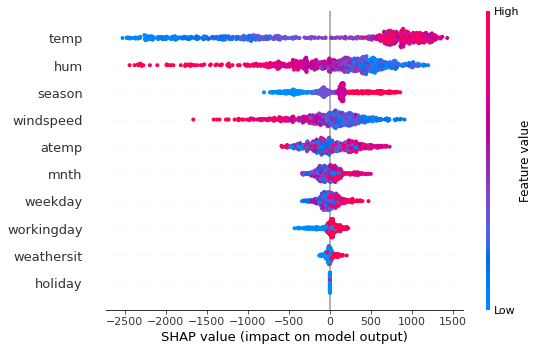

In [379]:
shap_vals = explainer.shap_values(X_train)
shap_df = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features'))
shap.summary_plot(shap_vals, X_train)

In [131]:
# shap.summary_plot(shap_vals, X_test, plot_type="bar")
shap.plots.waterfall(shap_values[0])
# shap_values

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [ ]:
# print(list(feature_groups.keys())[0])

# print(len(feature_groups))




In [ ]:
#     for key in feature_groups.keys():
#         for value in feature_groups[key]:
#             print(value)
#         print('ok')
        
#     for value in feature_groups.values():
#         print(value)

## define group shap

In [369]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [445]:
from itertools import repeat, chain
revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))

In [446]:
def grouped_shap(shap_vals, features, groups):
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

In [447]:
def data_group(data, groups):
    groupmap = revert_dict(groups)
    data_Tdf = pd.DataFrame(data, columns=pd.Index(features, name='features')).T
    data_Tdf['group'] = data_Tdf.reset_index().features.map(groupmap).values
    return data_Tdf.T

In [448]:
# data_Tdf = data_group(data, feature_groups)
# data_Tdf

In [449]:
groupmap = revert_dict(feature_groups)
groupmap

{'temp': 'comfort_factors',
 'atemp': 'comfort_factors',
 'hum': 'comfort_factors',
 'weathersit': 'weather',
 'windspeed': 'weather',
 'weekday': 'period_holiday_or_workdays',
 'workingday': 'period_holiday_or_workdays',
 'holiday': 'period_holiday_or_workdays',
 'season': 'period_year',
 'mnth': 'period_year'}

In [478]:
# shap_for_groups = grouped_shap(shap_vals, features, feature_groups)

shap_Tdf = pd.DataFrame(shap_values, columns=pd.Index(features, name='features')).T
shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
sum_group_shapley_values_df = shap_Tdf.groupby('group').sum().T



In [479]:
sum_group_shapley_values_df = sum_group_shapley_values_df[list(feature_groups.keys())]

sum_group_shapley_values_df

group,comfort_factors,weather,period_holiday_or_workdays,period_year
0,207.492232,48.540336,-102.744518,-396.910082
1,568.072139,487.198115,17.039510,569.990853
2,1857.691575,-68.969375,-66.300378,-515.576877
3,1641.492014,65.784248,-86.495240,99.235851
4,-2107.414273,-88.606875,-377.790368,651.148812
...,...,...,...,...
652,-1391.295686,594.257709,221.055724,641.190489
653,206.100417,-61.169563,-58.887783,-42.242834
654,2098.290341,226.031062,179.971175,447.228937
655,1389.117150,685.736454,179.002063,94.795340


In [47]:
shap_df

features,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-143.323956,-253.586126,0.0,-96.851053,-5.893465,-43.658322,445.849205,-392.999200,154.642228,92.198658
1,366.118189,203.872665,0.0,11.232291,5.807220,19.390863,814.218628,-228.553403,-17.593086,467.807252
2,-296.248519,-219.328358,0.0,-44.776681,-21.523697,-10.974881,1080.013857,352.073568,425.604151,-57.994494
3,141.484183,-42.248332,0.0,-105.720564,19.225323,-3.994689,855.799870,337.973374,447.718770,69.778937
4,617.696076,33.452736,0.0,-64.431926,-313.358442,-23.595582,-2146.077645,-147.391835,186.055208,-65.011293
...,...,...,...,...,...,...,...,...,...,...
652,558.963477,82.227012,0.0,262.283533,-41.227808,113.926621,-453.632138,311.926735,-1249.590283,480.331088
653,102.868541,-145.111376,0.0,-85.724391,26.836608,11.542846,511.421818,-474.768926,169.447525,-72.712409
654,165.941001,281.287936,0.0,161.449604,18.521571,-9.595961,1201.493403,669.366219,227.430718,235.627023
655,170.586660,-75.791319,0.0,130.522596,48.479466,88.751955,807.097558,-57.069485,639.089076,596.984499


In [ ]:
#     shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
# print(shap_Tdf)


In [ ]:
#     shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
# print(shap_Tdf)



In [ ]:
#     shap_grouped = shap_Tdf.groupby('group').sum().T
# print(shap_grouped)    


NameError: name 'shap_for_groups' is not defined

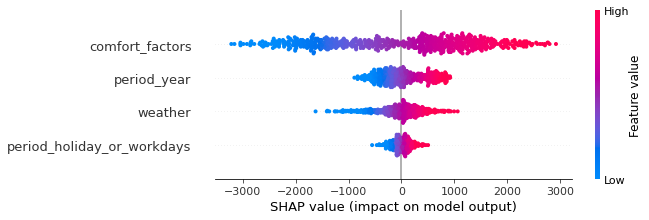

In [215]:
shap.summary_plot(shap_for_groups_df.values, shap_for_groups_df)


In [ ]:
# groups_by_type


In [216]:
features_comfort_factors = feature_groups['comfort_factors']
features_comfort_factors
# shap.summary_plot(shap_type.values, features=groups_by_type['comfort_factors'].tolist())

['temp', 'atemp', 'hum']

In [217]:
shap_df_comfort_factors = shap_df[feature_groups['comfort_factors']]
shap_df_comfort_factors

features,temp,atemp,hum
0,445.849205,-392.999200,154.642228
1,814.218628,-228.553403,-17.593086
2,1080.013857,352.073568,425.604151
3,855.799870,337.973374,447.718770
4,-2146.077645,-147.391835,186.055208
...,...,...,...
652,-453.632138,311.926735,-1249.590283
653,511.421818,-474.768926,169.447525
654,1201.493403,669.366219,227.430718
655,807.097558,-57.069485,639.089076


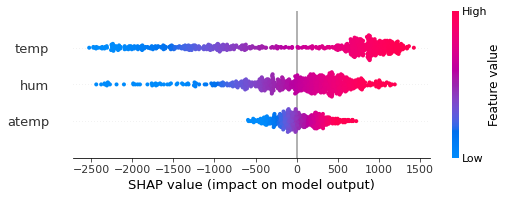

In [219]:
# shap_vals = exp.shap_values(X_test[features])

shap.summary_plot(shap_df_comfort_factors.values, shap_df_comfort_factors)
# shap.summary_plot(shap_df_comfort_factors.values, features = pd.Index(feature_groups['comfort_factors']))

In [ ]:
X

## LIME

In [196]:
import lime
from lime import lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=False,
                                                   mode="regression",
                                                   verbose=True)
explainer

In [207]:
import random
idx = random.randint(1, len(X_test))

print("Prediction : ", model.predict(X_test[idx-1:idx]))
print("Actual :     ", y_test[idx-1:idx])

explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names = ["cnt"],
                                                   mode="regression",
                                                   verbose=True,
                                                   random_state=123)

# explanation = explainer.explain_instance(X_test[idx-1:idx], model.predict(X_test), num_features=5)
# explanation

# # explanation = explainer.explain_instance(X_test[idx], model.predict, num_features=len(X_test.columns))
# explanation

Prediction :  [6504.908448]
Actual :      271    4839
Name: cnt, dtype: int64


In [201]:
model.predict(X_test)

array([6388.31760681, 5763.43460643, 1693.35442503, 1475.22980853,
       3183.28742616, 2626.70330006, 4348.39378682, 4093.83786491,
       5014.07250425, 1707.09054559, 1942.16639744, 2133.02597885,
       3385.83588827, 5895.64043014, 5441.04271696, 5182.45090962,
       6676.85776314, 4389.32796833, 2632.97530921, 4280.51190028,
       7242.3030065 , 1565.58861476, 4609.57399907, 5726.76228859,
        996.12181776, 5905.13733208, 5265.43377103, 7511.66161391,
       6618.72499124, 6998.13566362, 1415.45367294, 6330.37815713,
       4161.40105228, 6601.41370379, 1989.85524391, 2377.23256367,
       5410.39832474, 5308.02750549, 4118.7360409 , 2759.17300403,
       5560.46053746, 3146.88062373, 6504.908448  , 3815.54625316,
       5135.69997361, 6088.83764274, 2419.58161536, 4736.42420835,
       2016.68269588, 2592.5640219 , 4797.96596963, 5190.34204403,
       4712.56969744, 5503.80020574, 4128.00295703, 4477.57366043,
       3849.06475464, 3696.45896399, 5507.05534222, 2691.17455

In [209]:
i = np.random.randint(0, X_test.shape[0])

# print(X_test.iloc[4])

# print(i)

exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=2, top_labels=1)

AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'predict_proba'

In [399]:
X_train

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
103,2,8,0,4,1,1,0.467500,0.462742,0.540417,0.110700
703,4,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129
437,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950
590,3,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212
351,4,12,0,0,0,1,0.238333,0.245579,0.586250,0.169779
...,...,...,...,...,...,...,...,...,...,...
707,4,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379
192,3,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254
629,3,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229
559,3,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850


In [437]:
def perturb_with_feature_groups(X_train, num, feature_groups):
    
    return X_1

def perturb_with_features(X_train, num):
    
    return X_2


def check_same(X1, X2):
    X=[]
    for i in range(0, X1.shape[1]):
        temp = 0
        for j in range(0, X1.shape[0]):
            temp = temp + abs(X1.iloc[i,j] - X2.iloc[i,j])
        temp = temp / X1.shape[0]
        X.append(temp)
    return X


In [432]:
X = check_same(X_train[0:11], X_test[0:11])


IndexError: single positional indexer is out-of-bounds

In [425]:
X_test.shape

(74, 10)

In [391]:
import math

a = 9.6641
b = 8.6602
c = 5.2924
beta = 110.12

print("a=",a," b=",b, " c=",c, "beta=",beta)
S = a*c*math.sin((beta/180)*math.pi)*b
print("S=",S)

a= 9.6641  b= 8.6602  c= 5.2924 beta= 110.12
S= 415.906467029633


False